In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import scipy as sp
from scipy import interpolate
%matplotlib inline

In [5]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
e_vol[0]*1e-9

ModuleNotFoundError: No module named 'gdal'

### Surface area

In [ ]:
(e_vol[0] - e_vol[1])/0.5*1e-6

### Area layers

In [245]:
area = -np.diff(e_vol)/0.5/1000/1000
area

array([ 2.74517562e+03,  2.69553132e+03,  2.66903819e+03,  2.62608089e+03,
        2.59290231e+03,  2.53045133e+03,  2.46239986e+03,  2.33030417e+03,
        2.26686304e+03,  2.15755323e+03,  2.08099533e+03,  1.92363448e+03,
        1.82713990e+03,  1.62941020e+03,  1.48532584e+03,  1.24433011e+03,
        1.08277559e+03,  7.64488876e+02,  5.32153250e+02,  1.91653798e+02,
        6.56703990e+01,  3.29729598e+00,  1.56499009e+00,  2.63987594e-01,
        1.31508333e-01,  5.70612430e-02,  4.10298481e-02,  3.73055090e-02,
        3.22641574e-02,  2.48703394e-02,  1.73419917e-02,  1.24015847e-02,
        6.21758484e-03,  6.21758484e-03,  6.21758484e-03,  6.18399986e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

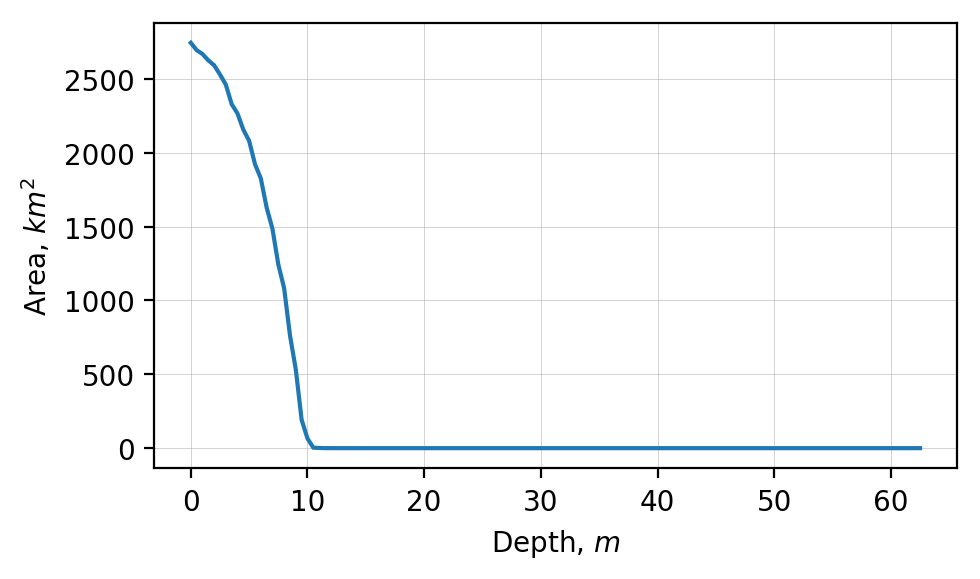

In [246]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

axes.plot(depths[:-1], area)
# axes.plot((bl.time + shift)/12 + 1996, bl.species['Csc']['concentration'].flatten())
# axes.scatter((cl_stclaitr['seq_m'].values+ shift)/12 + 1996, cl_stclaitr['Cl'].values, c=sns.color_palette()[1], s=10)
# axes.scatter((cl_stclaitr_210['seq_m'].values + shift)/12 + 1996, cl_stclaitr_210['Result B'].values, edgecolors=sns.color_palette()[3], s=50, marker='o', facecolors='white', zorder=10)

# axes.set_ylim(0,12)
# axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes.legend(loc=2)
# axes.set_ylabel('Lake St. Clair Cl, $mg\cdot L^{-1}$')


# handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('Depth, $m$')
axes.set_ylabel('Area, $km^2$')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/evap_recent.pdf')






### Average values

In [107]:
df = pd.read_csv('../../../measurements/GLNPO/GLENDA Cl.csv')
df['VALUE_1'] = pd.to_numeric(df['VALUE_1'], errors='coerce')
df = df.dropna(subset=['VALUE_1'])
df['STN_DEPTH_M'] = pd.to_numeric(df['STN_DEPTH_M'], errors='coerce')
df['SAMPLING_DATE'] = pd.to_datetime(df['SAMPLING_DATE'], errors='coerce')

In [82]:
western_basin = ['ER58', 'ER59', 'ER60', 'ER61', 'ER91M', 'ER92']
central_basin = ['ER42', 'ER43', 'ER73', 'ER37', 'ER36', 'ER38', 'ER78M', 'ER30', 'ER31', 'ER32', 'ER95B']
eastern_basin = ['ER93B', 'ER15M', 'ER63', 'ER09', 'ER10']

In [46]:
df = df[(df['STATION_ID'].isin(central_basin))]


In [36]:
area_spline = sp.interpolate.InterpolatedUnivariateSpline(depths[:-1], area, ext=3)

NameError: name 'depths' is not defined

In [251]:
area_spline(2)

array(2592.90230693)

In [37]:
EB_measuremnts = df[['SAMPLING_DATE', 'STN_DEPTH_M', 'VALUE_1']]

In [38]:
EB_measuremnts['Year'] = EB_measuremnts.SAMPLING_DATE.dt.year
EB_measuremnts['Month'] = EB_measuremnts.SAMPLING_DATE.dt.month

/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
EB_res = []

In [29]:
EB_measuremnts.tail()

,SAMPLING_DATE,STN_DEPTH_M,VALUE_1,Year,Month
8835,1999-08-07 01:42:00,34.1,15.7333,1999,8
8836,1999-08-07 01:42:00,34.1,15.7550,1999,8
8837,1999-08-07 01:42:00,34.1,15.5489,1999,8
8838,1999-08-07 01:42:00,34.1,15.7189,1999,8
8839,1999-08-07 01:42:00,34.1,15.7624,1999,8


In [256]:
for y in EB_measuremnts.Year.unique():
    y_slice = EB_measuremnts[(EB_measuremnts.Year==y)]
    for m in y_slice.Month.unique():
        my_slice = y_slice[y_slice.Month==m]
        length = my_slice.shape[0]
        accum = 0
        for i in range(length):
            accum +=area_spline(my_slice.iloc[i].STN_DEPTH_M)*my_slice.iloc[i].VALUE_1
        res = accum/area_spline(my_slice.STN_DEPTH_M).sum()
        EB_res.append([y,m,res])

In [257]:
pd.DataFrame(EB_res, columns=['Year', 'Month', 'Value']).to_csv('Western_basin_area_weighted_averages_mgL.csv')

In [39]:
EB_measuremnts.groupby(['Year','Month']).describe()['VALUE_1']['mean'].reset_index().to_csv('Western_basin_averages_mgL.csv')


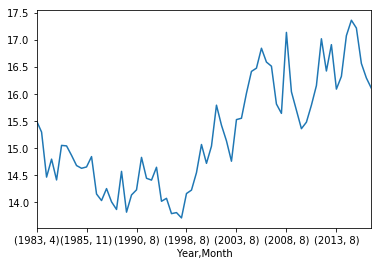

In [40]:
EB_measuremnts.groupby(['Year','Month']).describe()['VALUE_1']['mean'].plot()

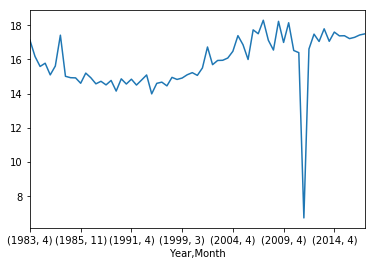

In [32]:
EB_measuremnts.groupby(['Year','Month']).describe()['VALUE_1']['mean'].plot()

In [75]:
df.head()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,...,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,Unnamed: 33,Year,Month
0,1,2000,April,Spring,Erie,SP2000,E058A00,ER58,9.3,41.684917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,4
1,2,2000,April,Spring,Erie,SP2000,E059A00,ER59,7.9,41.727317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,4
2,3,2000,April,Spring,Erie,SP2000,E061A00,ER61,9.1,41.946550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,4
3,4,2000,April,Spring,Erie,SP2000,E060A00,ER60,8.3,41.891233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,4
4,5,2000,April,Spring,Erie,SP2000,E059A00,ER59,7.9,41.727317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,4


In [117]:
from scipy import stats
df = df[['SAMPLING_DATE', 'STATION_ID', 'VALUE_1']]
df['Year'] = df.SAMPLING_DATE.dt.year
df['Month'] = df.SAMPLING_DATE.dt.month
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_cb = df[(df['STATION_ID'].isin(central_basin))]
df_eb = df[(df['STATION_ID'].isin(eastern_basin))]
df_wb = df[(df['STATION_ID'].isin(western_basin))]

In [118]:
df_cb = df_cb[(np.abs(stats.zscore(df_cb['VALUE_1'])) < 3)]
df_wb = df_wb[(np.abs(stats.zscore(df_wb['VALUE_1'])) < 3)]
df_eb = df_eb[(np.abs(stats.zscore(df_eb['VALUE_1'])) < 3)]


In [119]:
df_wb.head()

,SAMPLING_DATE,STATION_ID,VALUE_1,Year,Month
0,2000-04-15 13:57:00,ER58,14.56,2000,4
1,2000-04-15 12:35:00,ER59,16.13,2000,4
2,2000-04-15 08:43:00,ER61,19.62,2000,4
3,2000-04-15 11:11:00,ER60,15.20,2000,4
4,2000-04-15 12:35:00,ER59,16.31,2000,4


In [179]:
wb = df_wb.groupby(['Year','Month']).describe()['VALUE_1']['mean'].reset_index()
cb = df_cb.groupby(['Year','Month']).describe()['VALUE_1']['mean'].reset_index()
eb = df_eb.groupby(['Year','Month']).describe()['VALUE_1']['mean'].reset_index()

In [180]:
wb = wb.rename(columns={'mean':'WB'})
cb = cb.rename(columns={'mean':'CB'})
eb = eb.rename(columns={'mean':'EB'})

In [185]:
res = wb.merge(cb, left_on=['Year', 'Month'],right_on=['Year', 'Month'])
res = res.merge(eb, left_on=['Year', 'Month'],right_on=['Year', 'Month'])

In [188]:
res.to_csv('mean_cl_concentrations_measured.csv', index=False)

In [127]:
import seaborn as sns

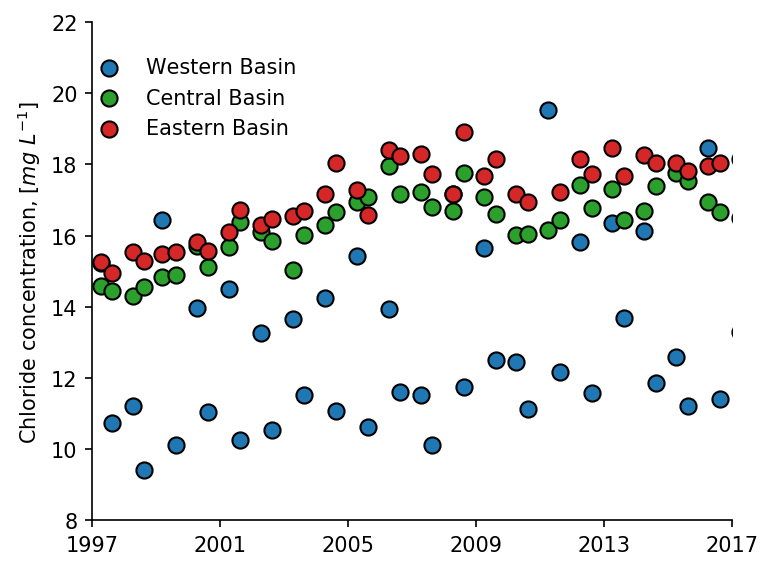

In [160]:
f, axes = plt.subplots(1,1, figsize=(1.1*5,1.1*4), dpi=150, sharex=True)

plt.scatter(wb.Year + (wb.Month-1)/11, wb['mean'].values, label='Western Basin', edgecolors='k', s=60, marker='o', facecolors=sns.color_palette()[0], zorder=10)
plt.scatter(cb.Year + (cb.Month-1)/11, cb['mean'].values, label='Central Basin', edgecolors='k', s=60, marker='o', facecolors=sns.color_palette()[2], zorder=10)
plt.scatter(eb.Year + (eb.Month-1)/11, eb['mean'].values, label='Eastern Basin', edgecolors='k', s=60, marker='o', facecolors=sns.color_palette()[3], zorder=10)
sns.despine()
plt.xlim(1997,2017)
plt.ylim(8,22)
plt.legend(frameon=0, loc=(-0.02,0.75))
plt.xticks(np.array([1996,2000,2004, 2008, 2012, 2016])+1)
plt.ylabel('Chloride concentration, [$mg$ $L^{-1}$]')
# plt.tight_layout()
f.savefig('cl_measured_in_basins.pdf')



In [122]:
wb.to_csv('Western_basin_averages_mgL.csv')

In [124]:
cb.to_csv('Central_basin_averages_mgL.csv')

In [125]:
eb.to_csv('Eastern_basin_averages_mgL.csv')